In [5]:
import os
import sys
sys.path.append(os.path.abspath('../../Dynamic_AMM'))
from env.amm import AMM
from env.oracle import OracleSimulator
from env.trader import Arbitrager


In [ ]:
import os
import sys
sys.path.append(os.path.abspath('../../Dynamic_AMM'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def simulate_and_plot_paths(sigmas, kappas, seed, n_steps=2000):
    # [Previous code remains the same until the plotting section]

    # Create bold font for trade count
    bold_font = FontProperties()
    bold_font.set_weight('bold')

    # In the plotting section, modify the bottom subplot legend:
    # Plot price ratios
    ax_bottom.plot(time, amm_ask_prices, '--', color='blue', label='AMM Ask')
    ax_bottom.plot(time, amm_bid_prices, '--', color='red', label='AMM Bid')
    ax_bottom.plot(time, mkt_ask_prices, '-', color='blue', label='Market Ask')
    ax_bottom.plot(time, mkt_bid_prices, '-', color='red', label='Market Bid')
    
    # Add empty plot for trade count in legend
    ax_bottom.plot([], [], ' ', label=f'Total Trades: {total_trades}',
                    fontproperties=bold_font)
    
    ax_bottom.set_ylim(ratio_ymin - ratio_padding, ratio_ymax + ratio_padding)
    ax_bottom.grid(True, alpha=0.3)
    
    # Remove the text box since we're putting it in legend
    # Titles and labels remain the same
    
    if i == 0 and j == 0:
        ax_top.legend()
        ax_bottom.legend(prop={'size': 10})  # Adjust size if needed

    # [Rest of the code remains the same]

# Define parameters and create plot
sigmas = [0.1, 0.4]
kappas = [1.0, 4.0]
seed = 42

# Create and save the plot
fig = simulate_and_plot_paths(sigmas, kappas, seed)
plt.show()
plt.savefig('trade_count_price_analysis.png', dpi=300, bbox_inches='tight')
plt.close()

IndentationError: unexpected indent (4264747651.py, line 17)

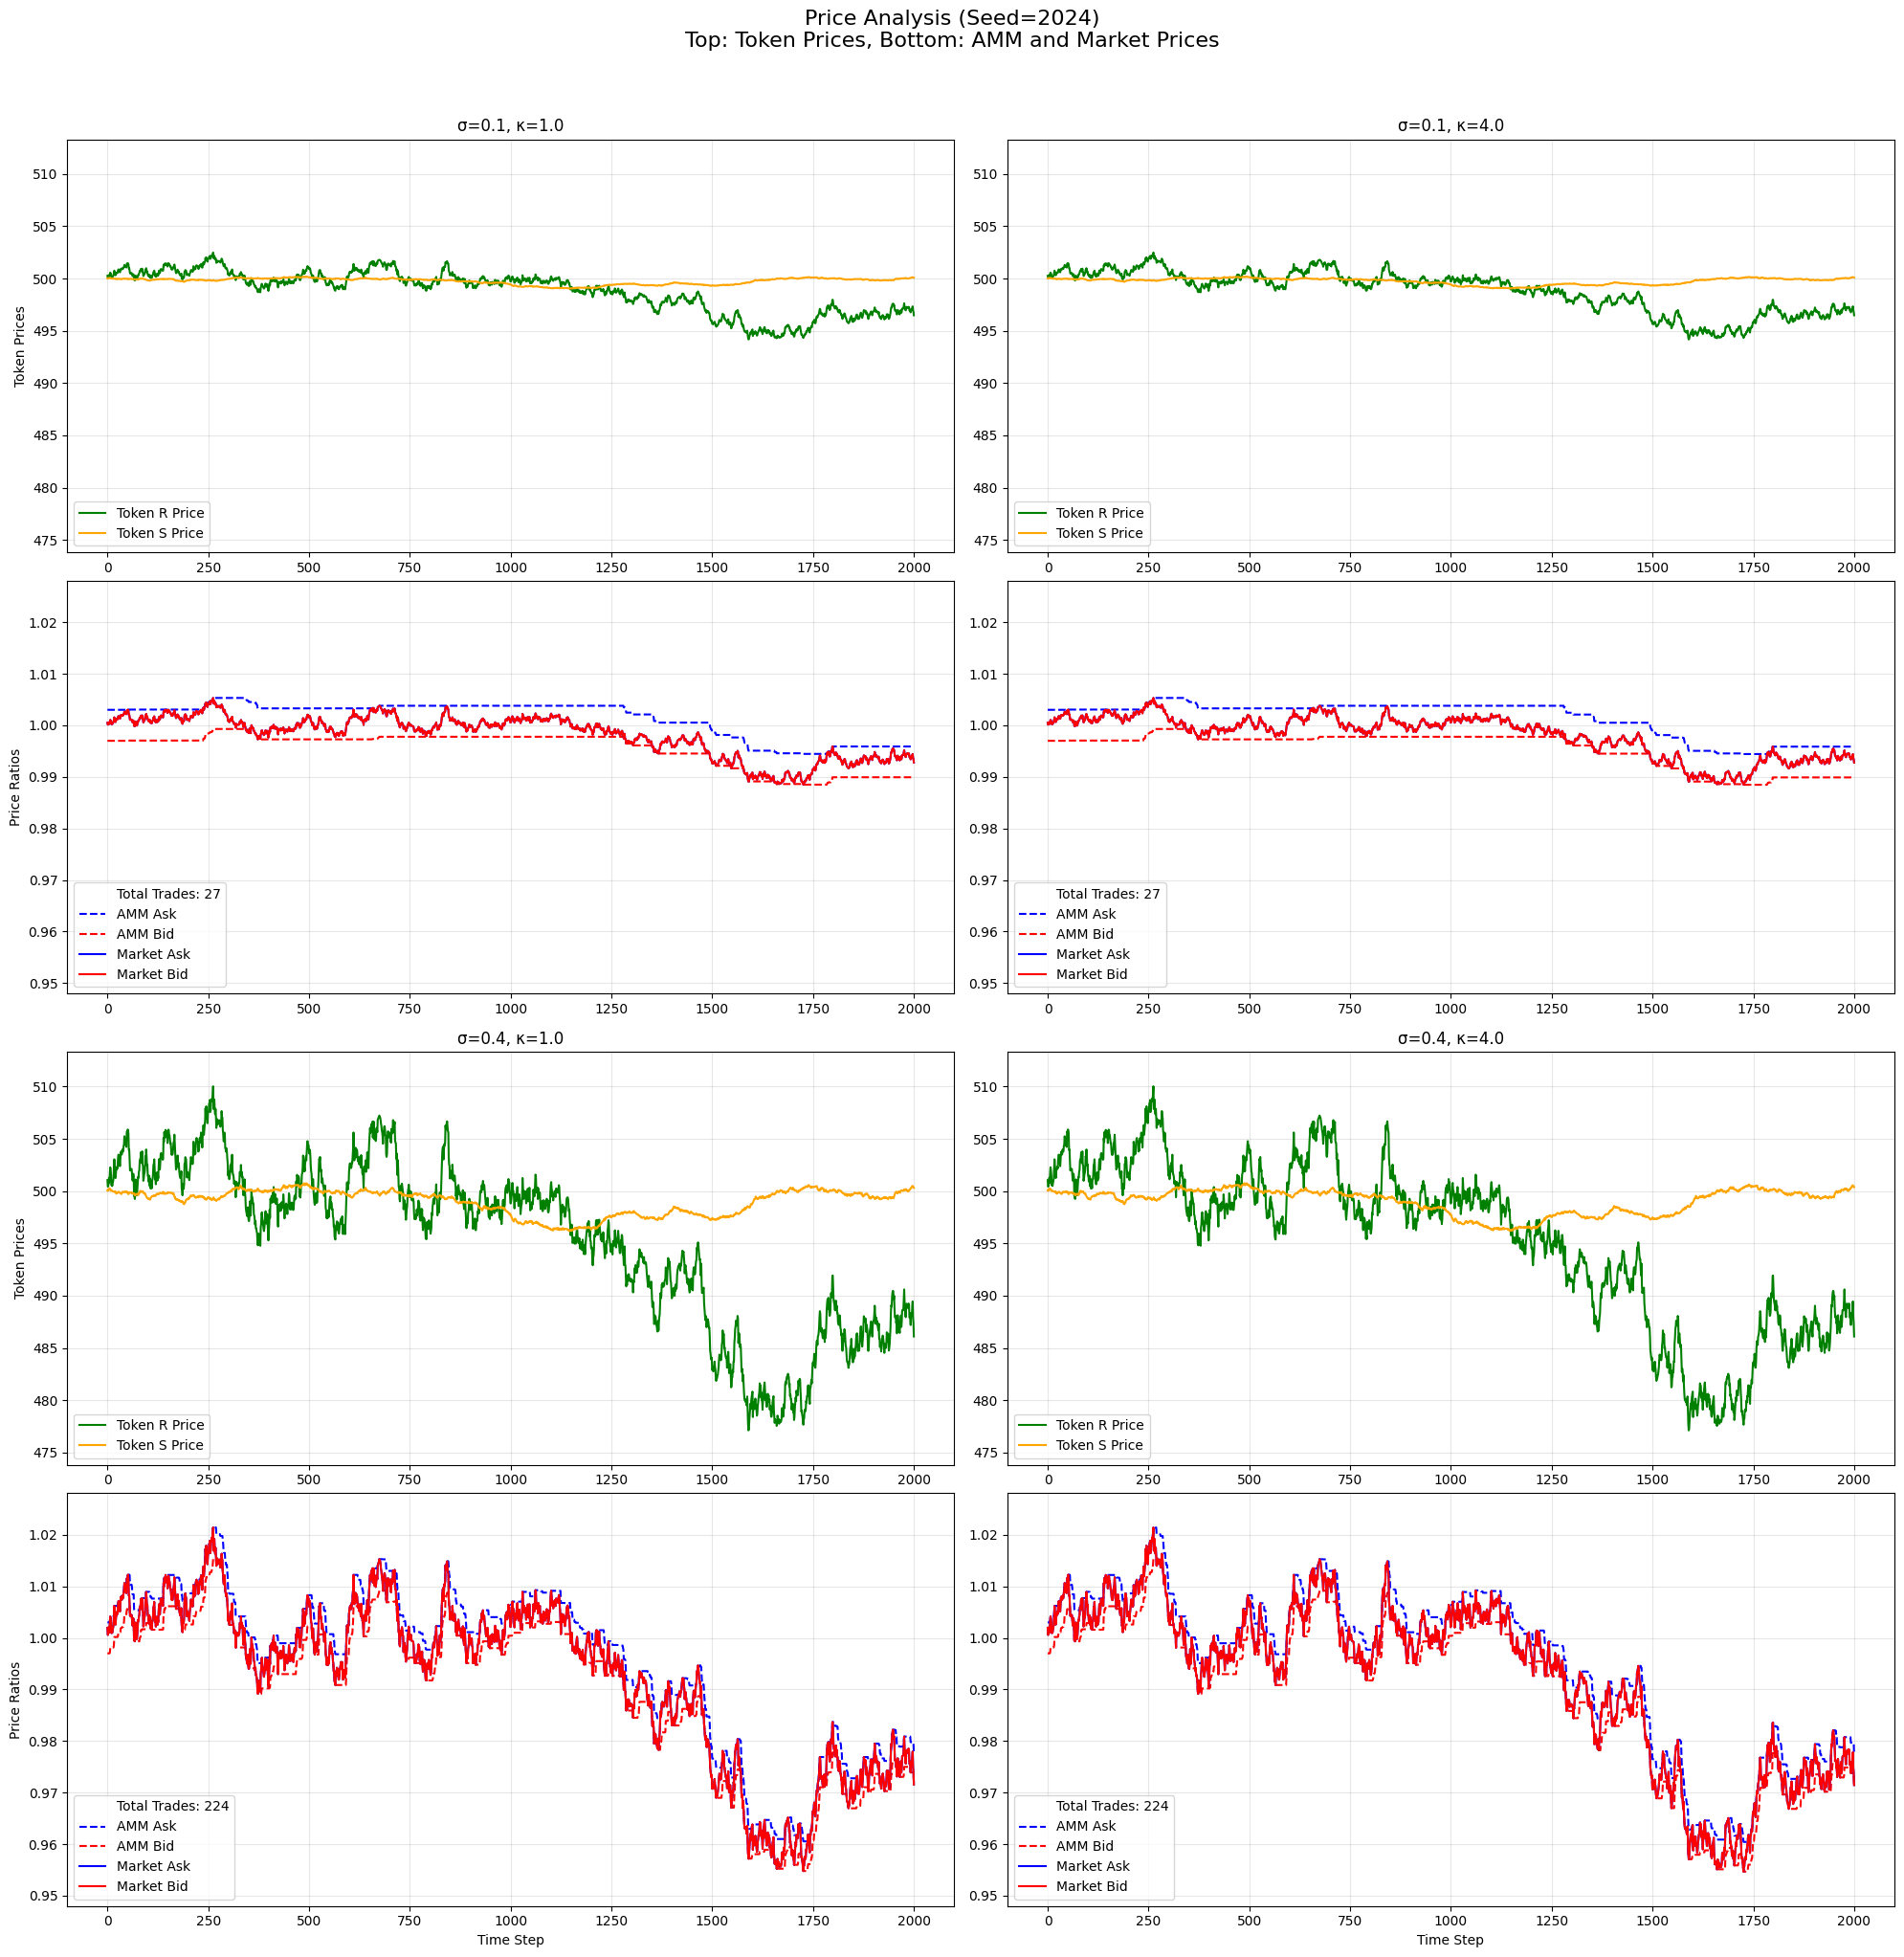

In [9]:
import os
import sys
sys.path.append(os.path.abspath('../../Dynamic_AMM'))
import numpy as np
import matplotlib.pyplot as plt
from env.oracle import OracleSimulator
from env.amm import AMM
from env.trader import Arbitrager

def simulate_and_plot_paths(sigmas, kappas, seed, n_steps=2000):
    """
    Create 2x2 grid with consistent y-axes across all subplots
    """
    fig = plt.figure(figsize=(20, 20))
    outer_grid = fig.add_gridspec(2, 2)
    
    # Lists to store all prices for y-axis limits
    all_token_prices = []
    all_ratio_prices = []
    
    # First pass: collect all prices to determine common y-axis limits
    for sigma in sigmas:
        for kappa in kappas:
            np.random.seed(seed)
            amm = AMM()
            oracle = OracleSimulator(amm=amm, sigma=sigma, kappa=kappa,seed=seed)
            trader = Arbitrager(oracle=oracle)
            
            for _ in range(n_steps):
                trade_info = trader.step()
                if 'total_number_trade' in trade_info:
                    total_trades = trade_info['total_number_trade']
                amm_ask, amm_bid, mkt_ask, mkt_bid = oracle.get_price()
                s_prices = oracle.get_token_prices('s')
                r_prices = oracle.get_token_prices('r')
                
                all_token_prices.extend([(r_prices['ask'] + r_prices['bid'])/2,
                                       (s_prices['ask'] + s_prices['bid'])/2])
                all_ratio_prices.extend([amm_ask, amm_bid, mkt_ask, mkt_bid])
    
    # Calculate common y-axis limits
    token_ymin, token_ymax = min(all_token_prices), max(all_token_prices)
    ratio_ymin, ratio_ymax = min(all_ratio_prices), max(all_ratio_prices)
    
    # Add some padding to the limits
    token_padding = (token_ymax - token_ymin) * 0.1
    ratio_padding = (ratio_ymax - ratio_ymin) * 0.1
    
    time = np.linspace(0, n_steps, n_steps)
    
    # Second pass: create plots with consistent y-axes
    for i, sigma in enumerate(sigmas):
        for j, kappa in enumerate(kappas):
            inner_grid = outer_grid[i, j].subgridspec(2, 1, height_ratios=[1, 1])
            ax_top = fig.add_subplot(inner_grid[0])
            ax_bottom = fig.add_subplot(inner_grid[1])
            
            np.random.seed(seed)
            amm = AMM()
            oracle = OracleSimulator(amm=amm, sigma=sigma, kappa=kappa, seed=seed)
            trader = Arbitrager(oracle=oracle)
            
            amm_ask_prices = []
            amm_bid_prices = []
            mkt_ask_prices = []
            mkt_bid_prices = []
            p_r_values = []
            p_s_values = []
            
            for _ in range(n_steps):
                trade_info = trader.step()
                if 'total_number_trade' in trade_info:
                    total_trades = trade_info['total_number_trade']
                amm_ask, amm_bid, mkt_ask, mkt_bid = oracle.get_price()
                s_prices = oracle.get_token_prices('s')
                r_prices = oracle.get_token_prices('r')
                
                amm_ask_prices.append(amm_ask)
                amm_bid_prices.append(amm_bid)
                mkt_ask_prices.append(mkt_ask)
                mkt_bid_prices.append(mkt_bid)
                p_r_values.append((r_prices['ask'] + r_prices['bid'])/2)
                p_s_values.append((s_prices['ask'] + s_prices['bid'])/2)
            
            # Plot with consistent y-axes
            ax_top.plot(time, p_r_values, '-', color='green', label='Token R Price')
            ax_top.plot(time, p_s_values, '-', color='orange', label='Token S Price')
            ax_top.set_ylim(token_ymin - token_padding, token_ymax + token_padding)
            ax_top.grid(True, alpha=0.3)
            ax_top.legend(loc='lower left')
            
            ax_bottom.plot([], [], ' ', label=f'Total Trades: {total_trades}')
            ax_bottom.plot(time, amm_ask_prices, '--', color='blue', label='AMM Ask')
            ax_bottom.plot(time, amm_bid_prices, '--', color='red', label='AMM Bid')
            ax_bottom.plot(time, mkt_ask_prices, '-', color='blue', label='Market Ask')
            ax_bottom.plot(time, mkt_bid_prices, '-', color='red', label='Market Bid')
            ax_bottom.set_ylim(ratio_ymin - ratio_padding, ratio_ymax + ratio_padding)
            ax_bottom.grid(True, alpha=0.3)
            ax_bottom.legend(loc='lower left')
            
            # Titles and labels
            ax_top.set_title(f'σ={sigma}, κ={kappa}', fontsize=12)
            if i == 1:
                ax_bottom.set_xlabel('Time Step')
            if j == 0:
                ax_top.set_ylabel('Token Prices')
                ax_bottom.set_ylabel('Price Ratios')
            

    plt.suptitle(f'Price Analysis (Seed={seed})\nTop: Token Prices, Bottom: AMM and Market Prices', 
                 fontsize=16, y=1.02)
    plt.tight_layout()
    
    return fig

# Define parameters
sigmas = [0.1, 0.4]
kappas = [1.0, 4.0]
seed = 2024

# Create and save the plot
fig = simulate_and_plot_paths(sigmas, kappas, seed)
plt.show()
plt.savefig('consistent_price_analysis.png', dpi=300, bbox_inches='tight')
plt.close()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def plot_comparison(initial_token):
    amm = AMM(fee_rate=0.003, initial_lr=initial_token, initial_ls=initial_token)

    total_size = amm.initial_lr
    swap_sizes = np.linspace(1, 100, 1000)
    in_fee_value = []
    out_fee_value = []
    initial_token_size = amm.initial_lr

    for swap_size in swap_sizes:
        amm.reset(fee_source=-1)
        info = amm.swap(-swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        out_fee_value.append(total_fee_value)
        
        amm.reset(fee_source=1)
        info = amm.swap(swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        in_fee_value.append(total_fee_value)
        
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot both lines on the same axis
    ax.plot(swap_sizes, in_fee_value, color='tab:green', label='Input Fee')
    ax.plot(swap_sizes, out_fee_value, color='tab:blue', label='Output Fee', linestyle='dashed')

    ax.set_xlabel('Swap Size', fontsize=12, fontweight='bold')
    ax.set_ylabel('Total Fee Value', fontsize=12, fontweight='bold')
    ax.grid(True)

    # Add legend
    ax.legend(loc='upper left', fontsize=10, frameon=True)

    # Add title
    plt.title(f'Total Fee Value vs Swap Size with initial reserve {amm.initial_lr}', 
              fontsize=14, fontweight='bold')
    
    fig.tight_layout()
    plt.show()

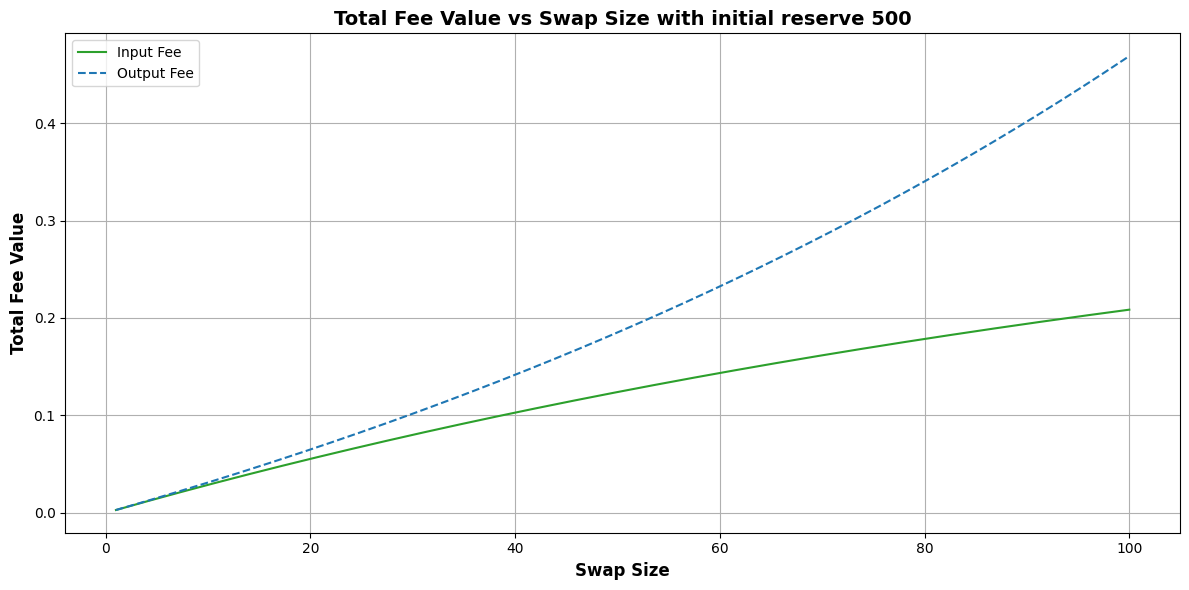

In [10]:
plot_comparison(initial_token=500)

In [4]:
def plot_fee_diff(initial_token):

    amm = AMM(fee_rate=0.003, initial_lr=initial_token, initial_ls=initial_token)

    total_size = amm.initial_lr
    swap_sizes = np.linspace(1, 100, 1000)
    in_fee_value = []
    out_fee_value = []
    initial_token_size = amm.initial_lr

    for swap_size in swap_sizes:
        amm.reset(fee_source=-1)
        info = amm.swap(-swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        out_fee_value.append(total_fee_value)
        
        amm.reset(fee_source=1)
        info = amm.swap(swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        in_fee_value.append(total_fee_value)


    # draw the plot for both income and output fee use left and right y-axis
    diff_fee = np.array(out_fee_value) - np.array(in_fee_value)
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Input fee values
    color = 'tab:green'
    ax1.set_xlabel('Swap Size', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Total Fee Value', color=color, fontsize=12, fontweight='bold')
    ax1.plot(swap_sizes, in_fee_value, color=color, label='Input Fee')
    ax1.plot(swap_sizes, out_fee_value, color='blue', label='Output Fee', linestyle='dashed')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)


    # Difference as bar chart with transparency
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.bar(swap_sizes, diff_fee, alpha=0.1, color=color, label='Difference Fee (output - input)')
    ax2.set_ylabel(f'Difference Fee Value', color='tab:red', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor=color)
    bar_min, bar_max = diff_fee.min(), diff_fee.max()
    ax2.set_ylim([bar_min, bar_max])
    

    # Adding a combined legend
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    all_lines = lines + bars
    all_labels = labels + bar_labels

    ax1.legend(all_lines, all_labels, loc='upper left', fontsize=10, frameon=True)

    # Adding a title and legends
    plt.title(f'Total Fee Value Difference with initial reserve {amm.initial_lr}', fontsize=14, fontweight='bold')
    fig.tight_layout()
    plt.show()

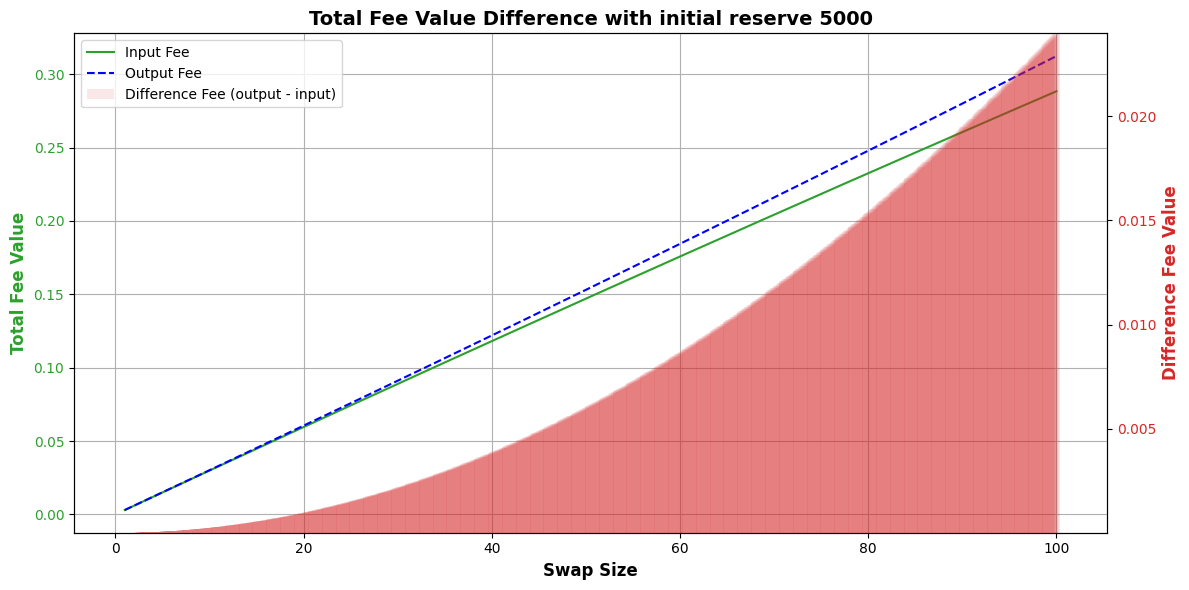

In [5]:
plot_fee_diff(initial_token=5000)

In [8]:
def plot_delta_fee_rate(max_swap_size=100):
    amm = AMM(fee_rate=0.003, initial_lr=100, initial_ls=100)
    swap_sizes = np.linspace(0, max_swap_size, 1000)
    f_stars = []
    ls = amm.initial_ls
    lr = amm.initial_lr
    f = amm.f
    for xr in swap_sizes:
        f_star = f * ((lr - xr) / (lr + (1-f) * xr)) ** 2
        f_stars.append(f_star)
        
    plt.figure(figsize=(12, 6))
    plt.plot(swap_sizes, f_stars, label=r"$f_{*}$", color='tab:blue')
    plt.xlabel(r'Swap Size $\Delta r$', fontsize=12, fontweight='bold')
    plt.ylabel(r'Nominal Fee Rate $f_{*}$', fontsize=12, fontweight='bold')
    plt.title(r'Nominal Fee Rate $f_{*}$ vs Swap Size $\Delta r$', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.legend([r"Initial Token = 100"], fontsize=12)
    plt.tight_layout()
    plt.show()

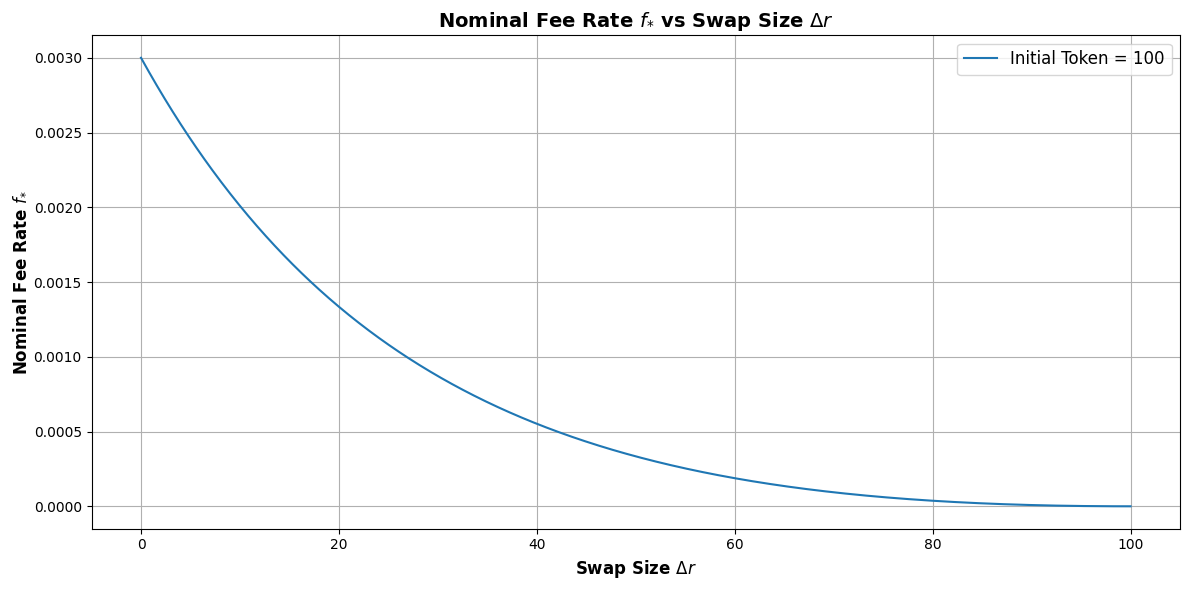

In [9]:
plot_delta_fee_rate(100)